In [3]:
import os
import warnings; warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')#highly recommended to visualize time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [4]:
os.listdir("./")

['beresford061203.csv',
 'ex_time_series_model.index',
 'ex_time_series_model.data-00000-of-00001',
 'ex_time_series_model.meta',
 '.ipynb_checkpoints',
 'windspeed_predictor.ipynb',
 'Untitled.ipynb',
 'data.csv',
 'data.py',
 'checkpoint']

In [6]:
data = pd.read_csv('data.csv',parse_dates=['Time Stamp'],index_col='Time Stamp')

In [7]:
data.head(10)

,Average Speed,Standard Deviation,Average Direction
Time Stamp,,,
2006-12-03 21:50:00,15.8,2.14,113
2006-12-03 22:00:00,17.1,2.99,113
2006-12-03 22:10:00,18.2,2.62,135
2006-12-03 22:20:00,19.2,3.21,135
2006-12-03 22:30:00,23.5,3.15,135
2006-12-03 22:40:00,22.3,3.32,135
2006-12-03 22:50:00,23.9,3.37,135
2006-12-03 23:00:00,25.4,3.42,135
2006-12-03 23:10:00,27.0,3.21,135


In [8]:
data.describe()

,Average Speed,Standard Deviation,Average Direction
count,4178.000000,4178.000000,4178.000000
mean,12.565606,1.477032,169.385831
std,5.052430,0.991789,101.682537
min,0.000000,0.000000,0.000000
25%,9.300000,0.960000,113.000000
50%,12.500000,1.390000,135.000000
75%,15.500000,1.820000,248.000000
max,33.400000,13.630000,338.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4178 entries, 2006-12-03 21:50:00 to 2007-01-01 22:00:00
Data columns (total 3 columns):
Average Speed         4178 non-null float64
Standard Deviation    4178 non-null float64
Average Direction     4178 non-null int64
dtypes: float64(2), int64(1)
memory usage: 130.6 KB


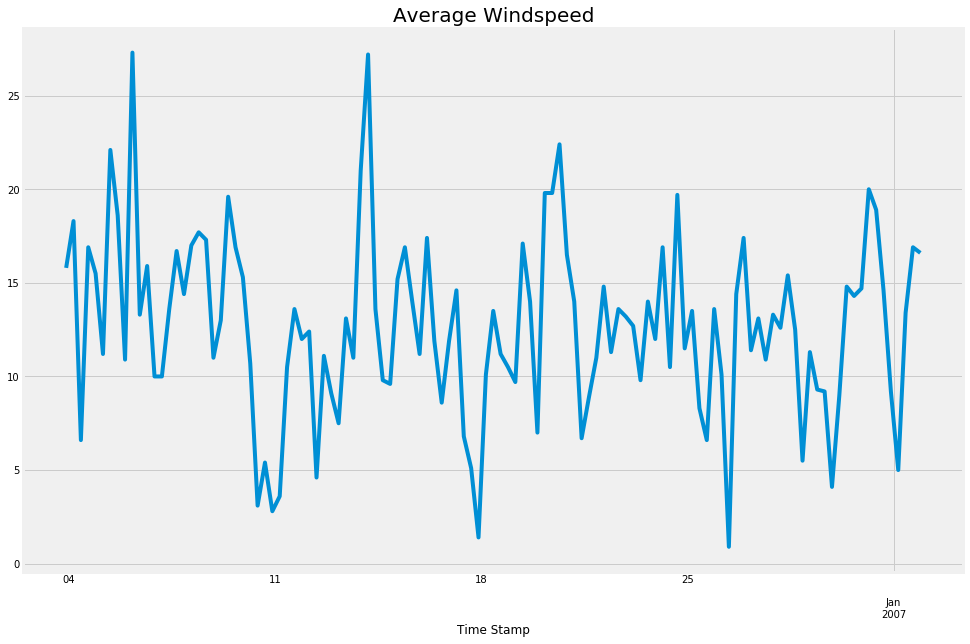

In [34]:
rcParams['axes.titlesize'] = 20
plt.figure(figsize=(15,10))
data['Average Speed'].asfreq('21600S').plot()#frequency of time series is kept 21600 seconds ==  6 hours.
plt.title("Average Windspeed",fontsize=rcParams['axes.titlesize'])
plt.savefig('windspeed.png')
plt.show()

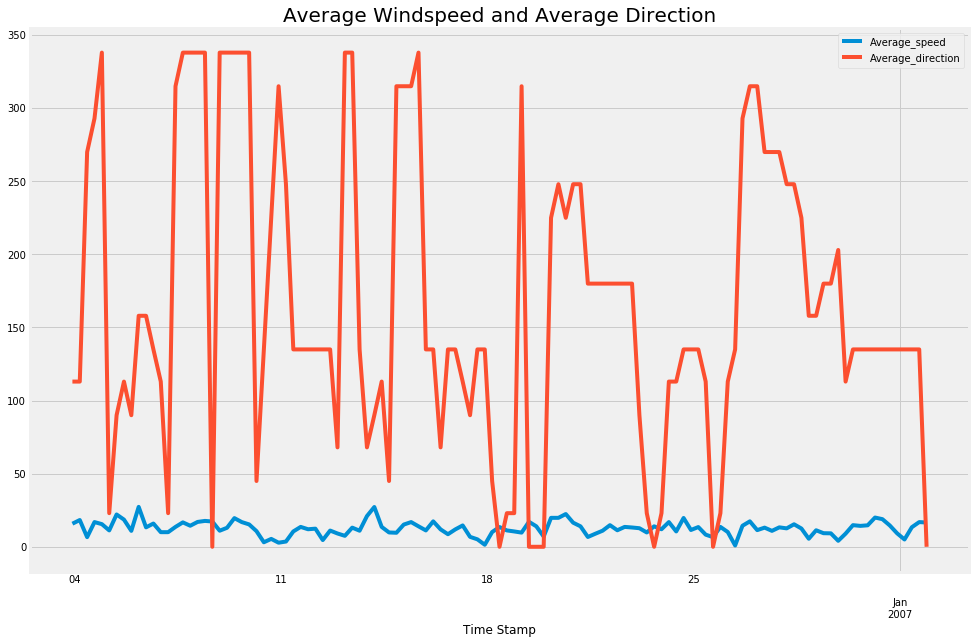

In [35]:
rcParams['axes.titlesize'] = 20
plt.figure(figsize=(15,10))
data['Average Speed'].asfreq('21600S').plot()#frequency of time series is kept 21600 seconds ==  6 hours.
data['Average Direction'].asfreq('21600S').plot()
plt.title("Average Windspeed and Average Direction",fontsize=rcParams['axes.titlesize'])
plt.legend(['Average_speed','Average_direction'])
plt.savefig('windspeed.png')
plt.show()

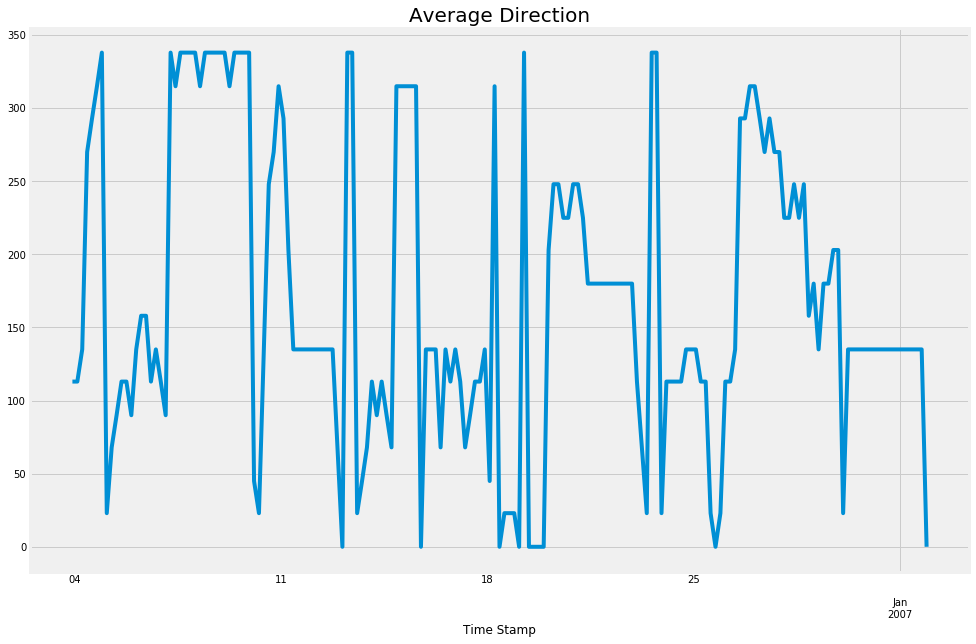

In [13]:
plt.figure(figsize=(15,10))
data['Average Direction'].asfreq('14400S').plot()#frequency of time series is kept 14400 seconds ==  4 hours.
plt.title("Average Direction",fontsize=rcParams['axes.titlesize'])
plt.show()

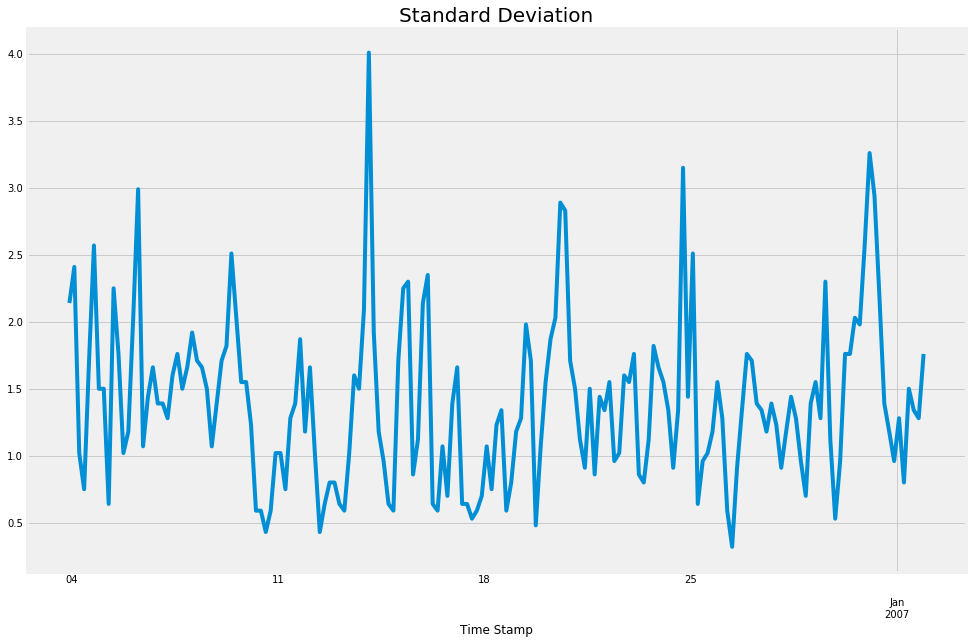

In [14]:

plt.figure(figsize=(15,10))
data['Standard Deviation'].asfreq('14400S').plot()#frequency of time series is kept 14400 seconds ==  4 hours.
plt.title("Standard Deviation",fontsize=rcParams['axes.titlesize'])
plt.show()

In [17]:
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [18]:
dr1 = pd.date_range(start='1/1/18', end='1/9/19',freq='M')
dr1

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
dr1 = pd.date_range(start='1/1/18', end='1/9/19',freq='A-DEC')
dr1

DatetimeIndex(['2018-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [28]:
dr1 = pd.date_range(start='20-3-19',end='20/4/19',periods=10)
dr1

DatetimeIndex(['2019-03-20 00:00:00', '2019-03-23 10:40:00',
               '2019-03-26 21:20:00', '2019-03-30 08:00:00',
               '2019-04-02 18:40:00', '2019-04-06 05:20:00',
               '2019-04-09 16:00:00', '2019-04-13 02:40:00',
               '2019-04-16 13:20:00', '2019-04-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

## Resampling of Data
### 1. Upsampling.
- Time series is upsampled from low frequency to high frequency. Involves filing or interpolating missing data.

### 2. Downsampling.
- Time series is downsampled from high frequency to low frequency. Involves aggregation of existing data.

In [31]:
data2 = data
data2 = data2.resample('3600S').mean()
data2.head(10)

,Average Speed,Standard Deviation,Average Direction
Time Stamp,,,
2006-12-03 21:00:00,15.800000,2.140000,113.000000
2006-12-03 22:00:00,20.700000,3.110000,131.333333
2006-12-03 23:00:00,24.750000,2.985000,127.666667
2006-12-04 00:00:00,21.566667,2.826667,116.666667
2006-12-04 01:00:00,21.750000,2.460000,116.666667
2006-12-04 02:00:00,21.533333,2.426667,113.000000
2006-12-04 03:00:00,20.233333,4.475000,113.000000
2006-12-04 04:00:00,16.983333,2.123333,131.333333
2006-12-04 05:00:00,10.800000,1.453333,135.000000


## Window Functions
Window functions are used to idenify sub-periods, calculates sub-metrics of sub-periods.

#### 1. Rolling
Same size and sliding.

#### 2. Expanding
Contains all prior values.

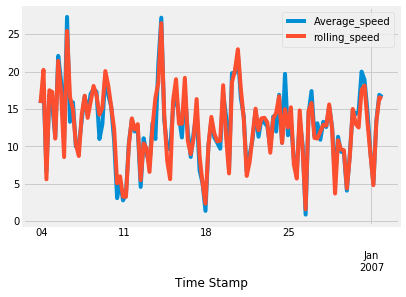

In [38]:
rolling_windspeed = data['Average Speed'].rolling('3600S').mean()
data['Average Speed'].asfreq('21600S').plot()
rolling_windspeed.asfreq('21600S').plot()
plt.legend(['Average_speed','rolling_speed'])
plt.show()

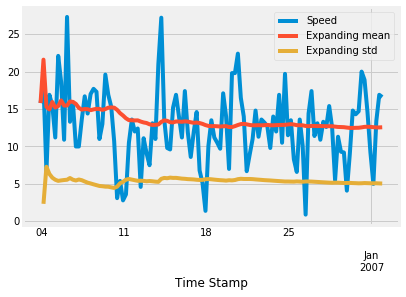

In [39]:
expanding_windspeed_mean = data['Average Speed'].expanding().mean()
expanding_windspeed_std = data['Average Speed'].expanding().std()
data['Average Speed'].asfreq('21600S').plot()
expanding_windspeed_mean.asfreq('21600S').plot()
expanding_windspeed_std.asfreq('21600S').plot()
plt.legend(['Speed','Expanding mean','Expanding std'])
plt.show()

### Autocorrelation and Partial Autocorrelation
- Autocorrelation : The autocorrelation function measures how correlated a series is with itself at different lags.

- Partial Autocorrelation : The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

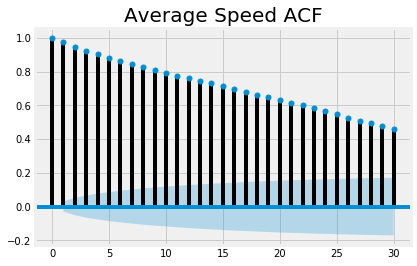

In [44]:
#Autocorrelation.
plot_acf(data['Average Speed'],lags=30,title='Average Speed ACF')
plt.show()

- Autocorrelation is close to 1 for each lag, therefore they are statistically significant.

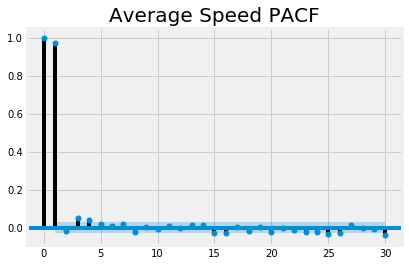

In [46]:
#Partial Autocorrelation.
plot_pacf(data['Average Speed'],lags=30,title='Average Speed PACF')
plt.show()

- Partial Autocorrelations after 2 lags are very low.

## Trend, Seasonality and Noise.


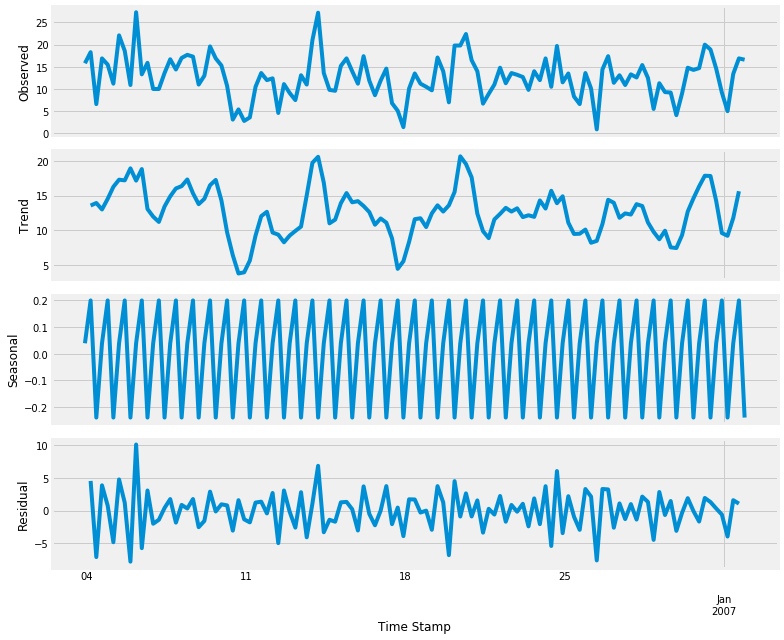

In [49]:
rcParams['figure.figsize'] = 11, 9
decomposed_data = sm.tsa.seasonal_decompose(data['Average Speed'].asfreq('21600S'),freq=3) # The frequncy is per 3 days.
figure = decomposed_data.plot()
plt.show()

- Hence, the time series has very uniform seasonality.
- There is no observed trend.
- The non-uniform noise is because of outliers and missing data.

## Random Walk Test.
### Augmented Dickey-Fuller test
- ADF tests the null hypothesis that a unit root is present in a ime series sample. This is a test for the presence of Random Walk in the time series, because Random Walks can't be forecasted because of the presence of random walks.
- Mackinnon's p-value is used for this purpose.
- The null hyposthesis of ADF test is that there is a unit root. If p-value is above the critical size, then we cannot reject that there is a unit root.

In [51]:
adf = adfuller(data['Average Speed'])
print("p-value for the given Time Series is: {}".format(float(adf[1])))
if(float(adf[1])>=0.05):
    print("Random walk")
else:
    print("Not a random walk.,")
    

p-value for the given Time Series is: 3.6935126623119333e-09
Not a random walk.,


## Stationarity
- Stationarity is important as non-stationary time series have too many parameters to account for when modelling time series.
- diff() method can easily convert a non-stationary series to a stationary series.

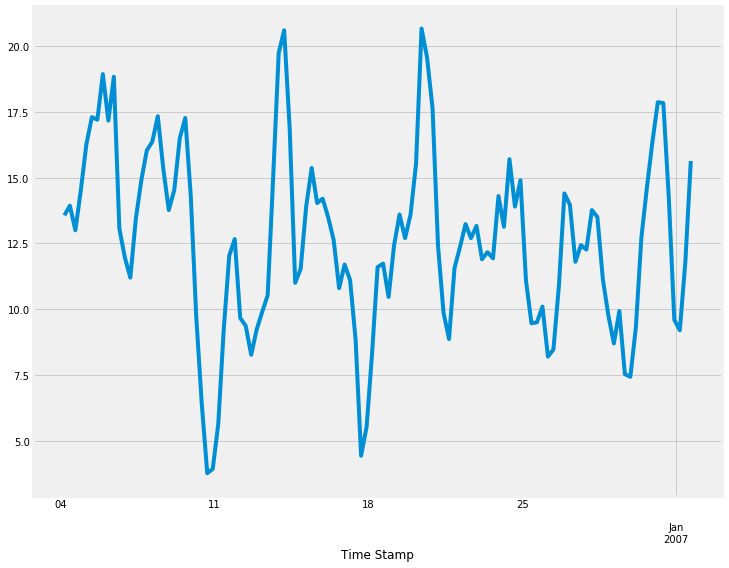

In [52]:
decomposed_data.trend.plot()

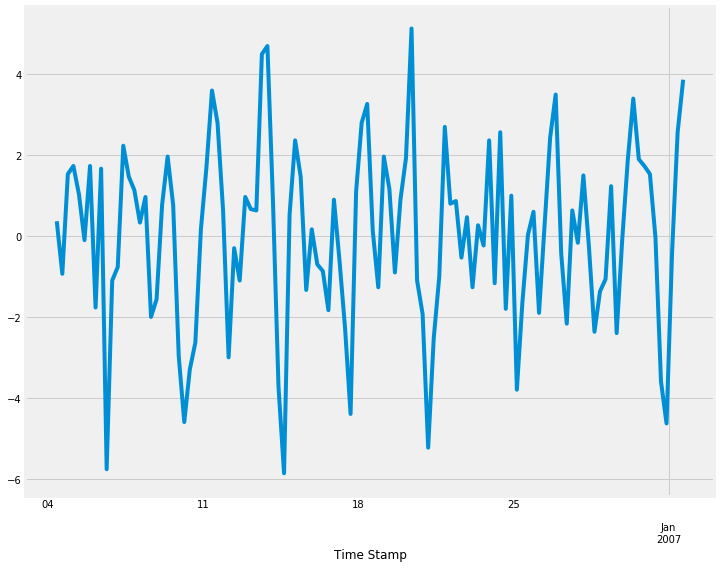

In [53]:
decomposed_data.trend.diff().plot()

## Modelling

### 1.AR model

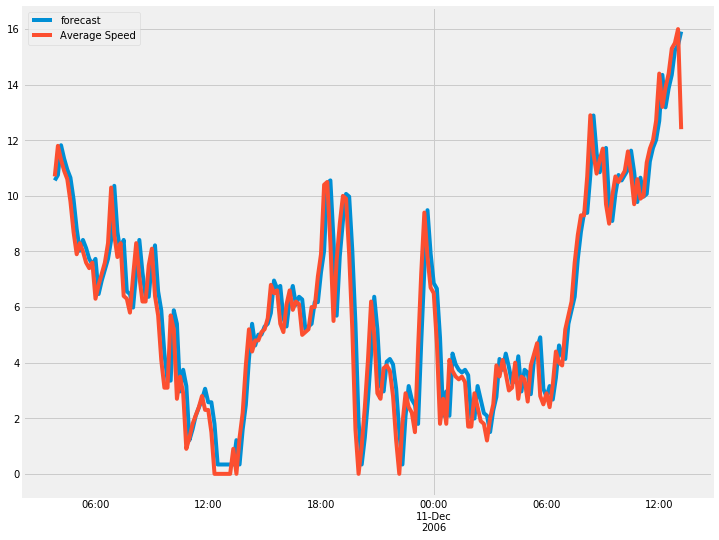

In [85]:
ar_model = ARMA(data['Average Speed'],order=(1,0))
res = ar_model.fit()
res.plot_predict(start=900, end=1100)
plt.show()

In [83]:
rmse = math.sqrt(mean_squared_error(data["Average Speed"].values, res.predict()))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.1579819744601718.


### 2. MA model

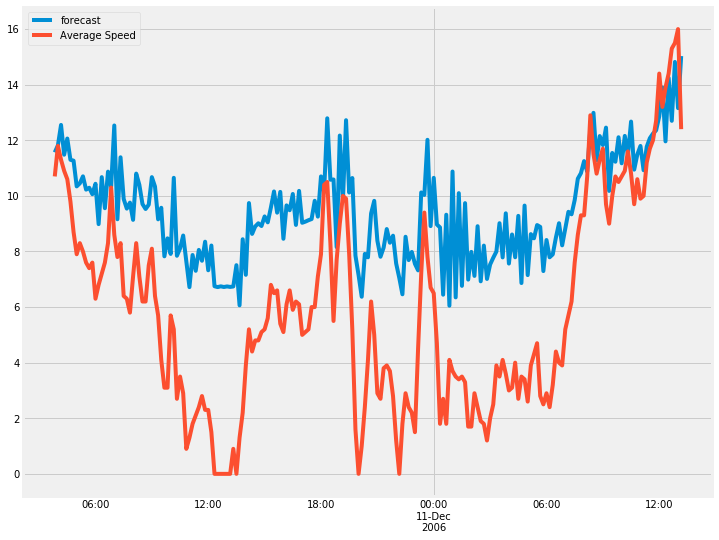

In [66]:
ma_model = ARMA(data['Average Speed'],order=(0,1))
res1 = ma_model.fit()
res1.plot_predict(start=900,end=1100)
plt.show()

In [87]:
rmse1 = math.sqrt(mean_squared_error(data["Average Speed"].values, res1.predict()))
print("The root mean squared error is {}.".format(rmse1))

The root mean squared error is 2.9245252346044577.


### 3. ARMA model

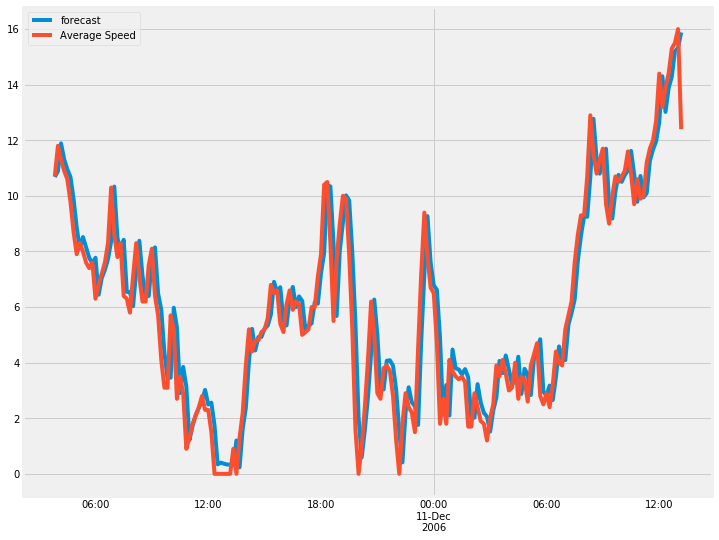

In [68]:
arma_model = ARMA(data['Average Speed'],order=(3,3))
res2 = arma_model.fit()
res2.plot_predict(start=900,end=1100)
plt.show()

In [81]:
rmse2 = math.sqrt(mean_squared_error(data["Average Speed"].values, res2.predict()))
print("The root mean squared error is {}.".format(rmse2))

The root mean squared error is 1.1547026017959419.


### 4. ARIMA model.

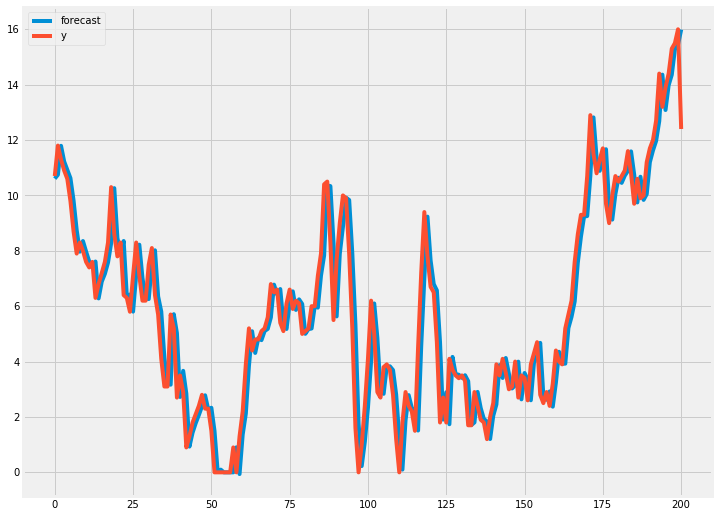

In [75]:
arima_model = ARIMA(data['Average Speed'].values,order=(2,1,0))
res3 = arima_model.fit()
res3.plot_predict(start=900,end=1100)
plt.show()

In [78]:
rmse3 = math.sqrt(mean_squared_error(data["Average Speed"].iloc[:-1].values, res3.predict()))
print("The root mean squared error is {}.".format(rmse3))

The root mean squared error is 13.545204998376375.
